In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('bc2024_results.csv')
df.head(n=100)

,prediction,Electoral District,GP,NDP,CP,Other,Total Valid Votes,Advance Voting Ballot Boxes,Final Voting Day Ballot Boxes,Out-of-district ballots,type1,type2,total
0,CPBC leaning,Abbotsford-Mission,0,"10,560","13,254",0,"23,814",5 of 5,16 of 16,Complete,358,246,604
1,CPBC safe,Abbotsford South,0,"7,232","12,853",670,"20,755",5 of 5,18 of 18,Complete,289,149,438
2,CPBC safe,Abbotsford West,0,"6,949","11,225",914,"19,088",4 of 4,16 of 16,Complete,372,223,595
3,CPBC leaning,Boundary-Similkameen,"1,422","10,271","11,733",771,"24,197",10 of 10,22 of 22,Complete,346,123,469
4,NDP likely,Bulkley Valley-Stikine,588,"3,602","4,875",236,"9,301",5 of 5,24 of 24,Complete,134,107,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,GRN leaning,Victoria-Beacon Hill,"9,027","12,715","5,171",0,"26,913",6 of 6,17 of 17,Complete,"1,282",587,"1,869"
89,NDP safe,Victoria-Swan Lake,"5,618","13,498","4,916",150,"24,182",7 of 7,16 of 16,Complete,914,380,"1,294"
90,CPBC safe,West Kelowna-Peachland,0,"7,119","13,198","5,511","25,828",6 of 6,16 of 16,Complete,447,221,668
91,CPBC likely,West Vancouver-Capilano,"1,374","6,721","11,692","5,141","24,928",6 of 6,14 of 14,Complete,638,253,891


In [5]:
df.GP = df.GP.str.replace(',', '').astype(float)
df.CP = df.CP.str.replace(',', '').astype(float)
df.NDP = df.NDP.str.replace(',', '').astype(float)
df.Other = df.Other.str.replace(',', '').astype(float)
df.type1 = df.type1.str.replace(',', '').astype(float)
#df.type2 = df.type2.str.replace(',', '').astype(float) #this is already int, no commas b/c no values > 999
df.total = df.total.str.replace(',', '').astype(float)
df['Total Valid Votes'] = df['Total Valid Votes'].str.replace(',', '').astype(float)

In [29]:
df['winner']= df[['GP','NDP','CP','Other']].idxmax(axis=1)
df['projected'] = df['prediction']
df['winner_num'] = df[['GP','NDP','CP','Other']].max(axis=1)
df['second_num'] = df[['GP','NDP','CP','Other']].apply(lambda row: row.nlargest(2).values[-1],axis=1)
df['margin'] = df['winner_num'] - df['second_num']
df['other_pct'] = df['Other']/df['Total Valid Votes']
df['margin_pct'] = df['margin'] / df['Total Valid Votes']
df['pct_necessary'] = (df['margin']/df['total'] + 1) * 0.5  
df['pct_necessary_withOther'] = (df['margin']/df['total'] + (1-df['other_pct'])) * 0.5  
df['winner_pct'] = df['winner_num']/df['Total Valid Votes']

In [30]:
df.head()

,prediction,Electoral District,GP,NDP,CP,Other,Total Valid Votes,Advance Voting Ballot Boxes,Final Voting Day Ballot Boxes,Out-of-district ballots,...,winner,projected,winner_num,second_num,margin,margin_pct,pct_necessary,winner_pct,other_pct,pct_necessary_withOther
0,CPBC leaning,Abbotsford-Mission,0.0,10560.0,13254.0,0.0,23814.0,5 of 5,16 of 16,Complete,...,CP,CPBC leaning,13254.0,10560.0,2694.0,0.113127,2.730132,0.556563,0.000000,2.730132
1,CPBC safe,Abbotsford South,0.0,7232.0,12853.0,670.0,20755.0,5 of 5,18 of 18,Complete,...,CP,CPBC safe,12853.0,7232.0,5621.0,0.270826,6.916667,0.619272,0.032281,6.900526
2,CPBC safe,Abbotsford West,0.0,6949.0,11225.0,914.0,19088.0,4 of 4,16 of 16,Complete,...,CP,CPBC safe,11225.0,6949.0,4276.0,0.224015,4.093277,0.588066,0.047883,4.069336
3,CPBC leaning,Boundary-Similkameen,1422.0,10271.0,11733.0,771.0,24197.0,10 of 10,22 of 22,Complete,...,CP,CPBC leaning,11733.0,10271.0,1462.0,0.060421,2.058635,0.484895,0.031863,2.042704
4,NDP likely,Bulkley Valley-Stikine,588.0,3602.0,4875.0,236.0,9301.0,5 of 5,24 of 24,Complete,...,CP,NDP likely,4875.0,3602.0,1273.0,0.136867,3.141079,0.524137,0.025374,3.128392


In [7]:
the_hist = pd.crosstab(df['winner'],df['projected'])
the_hist = the_hist[['CPBC safe','CPBC likely','CPBC leaning','CPBC Toss up','NDP Toss up','NDP leaning','NDP likely','NDP safe','GRN leaning','GRN likely']]

<Figure size 1000x1000 with 0 Axes>

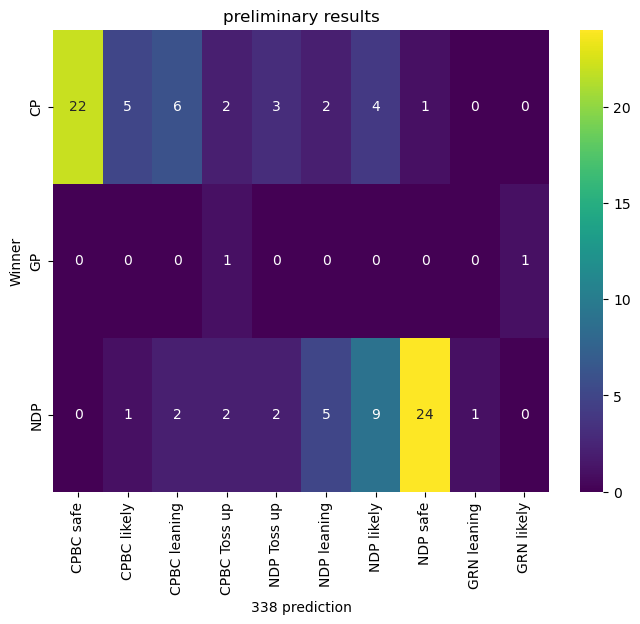

In [8]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
plt.figure(figsize=(8, 6))
sns.heatmap(the_hist, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('preliminary results')
plt.xlabel('338 prediction')
plt.ylabel('Winner')
plt.show()


<Figure size 1000x1000 with 0 Axes>

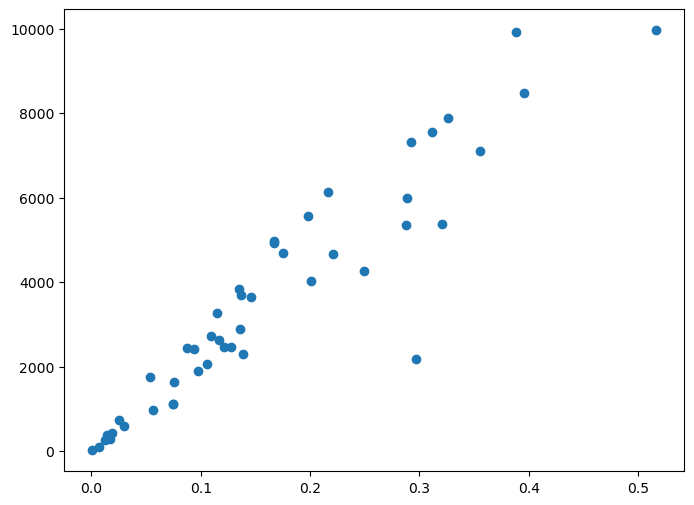

In [9]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
plt.figure(figsize=(8, 6))
plt.scatter(df[df['winner']=='NDP']['margin_pct'],df[df['winner']=='NDP']['margin'])
plt.show()


<Figure size 1000x1000 with 0 Axes>

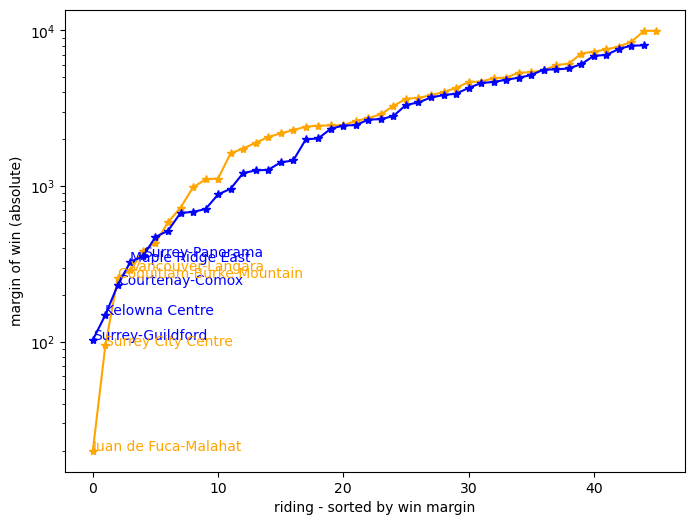

<Figure size 640x480 with 0 Axes>

In [10]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
plt.figure(figsize=(8, 6))
plt.plot(np.sort(df[df['winner']=='NDP']['margin']),color="orange",marker="*")
plt.plot(np.sort(df[df['winner']=='CP']['margin']),color="blue",marker="*")

ind = np.argsort(df[df['winner']=='NDP']['margin'])
ndp_margins =np.array(df[df['winner']=='NDP']['margin'])[ind]
ndp_riding_names = np.array(df[df['winner']=='NDP']['Electoral District'])[ind]

ind = np.argsort(df[df['winner']=='CP']['margin'])
cp_margins = np.array(df[df['winner']=='CP']['margin'])[ind]
cp_riding_names = np.array(df[df['winner']=='CP']['Electoral District'])[ind]

for imarker, (marg,text) in enumerate(zip(cp_margins,cp_riding_names)):
    plt.text(imarker, marg, text,color='blue')
    if imarker > 3: break


for imarker, (marg,text) in enumerate(zip(ndp_margins,ndp_riding_names)):
    if imarker > 3: break
    plt.text(imarker, marg, text,color='orange')

ax = plt.gca()
ax.set_yscale('log')
ax.set_xlabel("riding - sorted by win margin")
ax.set_ylabel("margin of win (absolute)")
plt.show()

<Figure size 1000x1000 with 0 Axes>

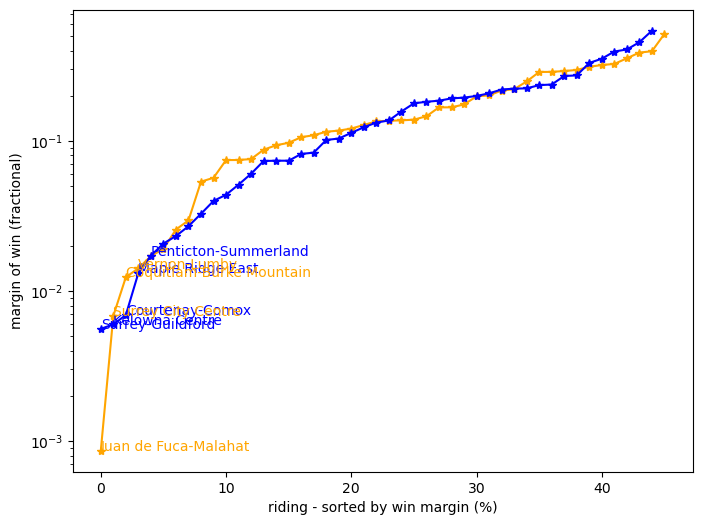

<Figure size 640x480 with 0 Axes>

In [11]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
plt.figure(figsize=(8, 6))
plt.plot(np.sort(df[df['winner']=='NDP']['margin_pct']),color="orange",marker="*")
plt.plot(np.sort(df[df['winner']=='CP']['margin_pct']),color="blue",marker="*")

ind = np.argsort(df[df['winner']=='NDP']['margin_pct'])
ndp_margins =np.array(df[df['winner']=='NDP']['margin_pct'])[ind]
ndp_riding_names = np.array(df[df['winner']=='NDP']['Electoral District'])[ind]

ind = np.argsort(df[df['winner']=='CP']['margin_pct'])
cp_margins = np.array(df[df['winner']=='CP']['margin_pct'])[ind]
cp_riding_names = np.array(df[df['winner']=='CP']['Electoral District'])[ind]

for imarker, (marg,text) in enumerate(zip(cp_margins,cp_riding_names)):
    plt.text(imarker, marg, text,color='blue')
    if imarker > 3: break


for imarker, (marg,text) in enumerate(zip(ndp_margins,ndp_riding_names)):
    if imarker > 3: break
    plt.text(imarker, marg, text,color='orange')

ax = plt.gca()
ax.set_yscale('log')
ax.set_xlabel("riding - sorted by win margin (%)")
ax.set_ylabel("margin of win (fractional)")
plt.show()

<Figure size 1000x1000 with 0 Axes>

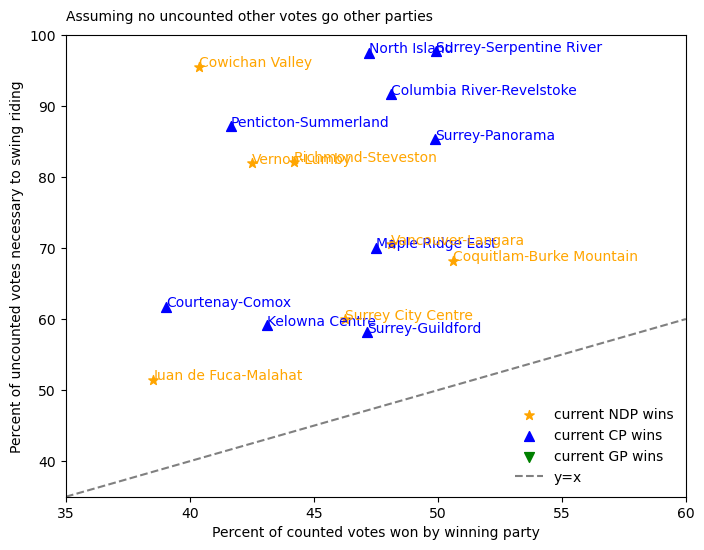

In [54]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
plt.figure(figsize=(8, 6))

ndp_wins = df[(df['winner']=='NDP') & (df['pct_necessary'] < 1)]
cp_wins = df[(df['winner']=='CP') & (df['pct_necessary'] < 1)]
gp_wins = df[(df['winner']=='GP') & (df['pct_necessary'] < 1)]

plt.scatter(ndp_wins['winner_pct']*100,ndp_wins['pct_necessary']*100,color="orange",marker="*",label = 'current NDP wins',s=50)
plt.scatter(cp_wins['winner_pct']*100,cp_wins['pct_necessary']*100,color="blue",marker="^",label = 'current CP wins',s=50)
plt.scatter(gp_wins['winner_pct']*100,gp_wins['pct_necessary']*100,color="green",marker="v",label = 'current GP wins',s=50)

for x,y,text in zip(cp_wins['winner_pct']*100,cp_wins['pct_necessary']*100,cp_wins['Electoral District']):
    plt.text(x, y, text,color='blue')

for x,y,text in zip(ndp_wins['winner_pct']*100,ndp_wins['pct_necessary']*100,ndp_wins['Electoral District']):
    plt.text(x, y, text,color='orange')

plt.text(35,102,'Assuming no uncounted other votes go other parties')

ax = plt.gca()
#ax.set_yscale('log')
ax.set_xlabel("Percent of counted votes won by winning party")
ax.set_ylabel("Percent of uncounted votes necessary to swing riding")

ax.axline([0, 0], [100, 100],color='gray',linestyle='--',label='y=x')

ax.set_xlim(35,60)
ax.set_ylim(35,100)

plt.legend(frameon=False,loc='lower right')
plt.savefig("pct_to_swing_noOtherVotes.pdf")
plt.show()

<Figure size 1000x1000 with 0 Axes>

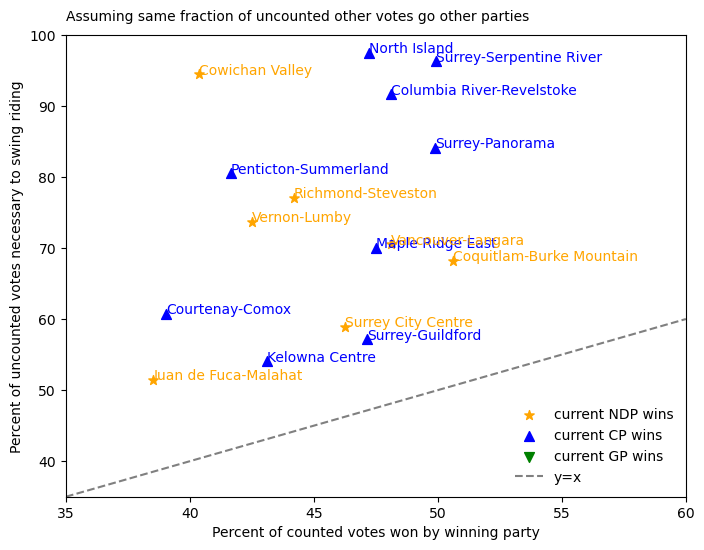

In [55]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
plt.figure(figsize=(8, 6))

ndp_wins = df[(df['winner']=='NDP') & (df['pct_necessary_withOther'] < 1)]
cp_wins = df[(df['winner']=='CP') & (df['pct_necessary_withOther'] < 1)]
gp_wins = df[(df['winner']=='GP') & (df['pct_necessary_withOther'] < 1)]

plt.scatter(ndp_wins['winner_pct']*100,ndp_wins['pct_necessary_withOther']*100,color="orange",marker="*",label = 'current NDP wins',s=50)
plt.scatter(cp_wins['winner_pct']*100,cp_wins['pct_necessary_withOther']*100,color="blue",marker="^",label = 'current CP wins',s=50)
plt.scatter(gp_wins['winner_pct']*100,gp_wins['pct_necessary_withOther']*100,color="green",marker="v",label = 'current GP wins',s=50)

for x,y,text in zip(cp_wins['winner_pct']*100,cp_wins['pct_necessary_withOther']*100,cp_wins['Electoral District']):
    plt.text(x, y, text,color='blue')

for x,y,text in zip(ndp_wins['winner_pct']*100,ndp_wins['pct_necessary_withOther']*100,ndp_wins['Electoral District']):
    plt.text(x, y, text,color='orange')

plt.text(35,102,'Assuming same fraction of uncounted other votes go other parties')

ax = plt.gca()
#ax.set_yscale('log')
ax.set_xlabel("Percent of counted votes won by winning party")
ax.set_ylabel("Percent of uncounted votes necessary to swing riding")

ax.axline([0, 0], [100, 100],color='gray',linestyle='--',label='y=x')

ax.set_xlim(35,60)
ax.set_ylim(35,100)

plt.legend(frameon=False,loc='lower right')
plt.savefig("pct_to_swing_nominalOtherVotes.pdf")

plt.show()